#File number two

<p></p>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/PSU work/IMDB Dataset.csv")

Mounted at /content/drive/


In [2]:
# this is the first comment here 

import pandas as pd
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
dft = df.copy()

In [4]:
# functions to do the Cleaning 

def rem_html(text):
    return re.sub("<[^>]+>"," ", text)

def rem_url(text):
    return re.sub("\w+://\S+"," ", text)

def rem_hash(text):
    return re.sub("#"," ", text)

def rem_underscore(text):
    return re.sub("_"," ", text)

def rem_dollar(text):
    return re.sub("$"," ", text)

def rem_brk(text):
    return re.sub("[\(\)]"," ", text)

def rem_mention(text):
    return re.sub("@[^ ]+"," ", text)

def rem_date(text):
    return re.sub("([0-9]{2}-[0-9]{1,2}-[0-9]{4})|([0-9]{2}/[0-9]{1,2}/[0-9]{4})"," ",text)

def rem_specialChar(text):
   return re.sub('[^a-zA-z0-9\s]'," ",text)

def lowerCase(text):
    return(text.lower())
    


#set stopwords to english
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


#Cleaning Apply function 
df['review'] = df['review'].apply(rem_html)
df['review'] = df['review'].apply(rem_url)
df['review'] = df['review'].apply(rem_hash)
df['review'] = df['review'].apply(rem_underscore)
df['review'] = df['review'].apply(rem_dollar)
df['review'] = df['review'].apply(rem_brk)
df['review'] = df['review'].apply(rem_mention)
df['review'] = df['review'].apply(rem_date)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(simple_stemmer)
df['review'] = df['review'].apply(rem_specialChar)
df['review'] = df['review'].apply(lowerCase)
df['review'] = df['review'].apply(lowerCase)

In [30]:
# KNN for text Clsfc
from sklearn.model_selection import train_test_split
RAND_STATE = 476
test_size = 0.25
idx_train, idx_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.25, random_state=RAND_STATE)








from sklearn.feature_extraction.text import CountVectorizer
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
bow_train=cv.fit_transform(idx_train)

#transformed test reviews
bow_test=cv.transform(idx_test)



#print('BOW_cv_train:',cv_train_reviews.shape)
#print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names


In [31]:
from sklearn.metrics import classification_report
#from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

#clf = MultinomialNB()
# fit the classifier on the X_train and y_train
knn.fit(bow_train, y_train)
#
y_pred = knn.predict(bow_test)

print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

    negative       0.96      0.50      0.66     12003
    positive       0.04      0.49      0.07       497

    accuracy                           0.50     12500
   macro avg       0.50      0.50      0.37     12500
weighted avg       0.92      0.50      0.64     12500



In [32]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[6014  253]
 [5989  244]]


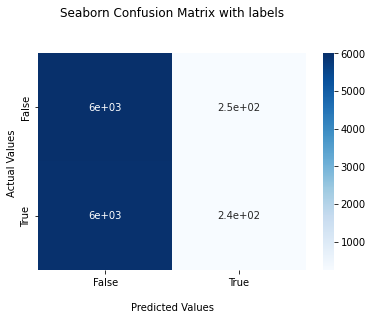

In [33]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [7]:
from sklearn.metrics import classification_report
#from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)

#clf = MultinomialNB()
# fit the classifier on the X_train and y_train
knn.fit(bow_train, y_train)
#
y_pred = knn.predict(bow_test)

print(classification_report(y_pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       1.00      0.50      0.67     12500
    positive       0.00      0.00      0.00         0

    accuracy                           0.50     12500
   macro avg       0.50      0.25      0.33     12500
weighted avg       1.00      0.50      0.67     12500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb



In [9]:
print(imdb.load_data())

17473536/17464789 [==============================] - 0s 0us/step
((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472

In [10]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 233s 293ms/step - loss: 0.4281 - accuracy: 0.8029 - val_loss: 0.3757 - val_accuracy: 0.8355
Epoch 2/15
782/782 [==============================] - 228s 292ms/step - loss: 0.2581 - accuracy: 0.8973 - val_loss: 0.3925 - val_accuracy: 0.8320
Epoch 3/15
782/782 [==============================] - 229s 292ms/step - loss: 0.1673 - accuracy: 0.9388 - val_loss: 0.4608 - val_accuracy: 0.8271
Epoch 4/15
782/782 [==============================] - 229s 293ms/step - loss: 0.1138 - accuracy: 0.9590 - val_loss: 0.6714 - val_accuracy: 0.8191
Epoch 5/15
782/782 [==============================] - 230s 295ms/step - loss: 0.0796 - accuracy: 0.9722 - val_loss: 0.6056 - val_accuracy: 0.8177
Epoch 6/15
782/782 [==============================] - 229s 292ms/step - loss: 0.0518 - accuracy: 0.9825

In [23]:
!pip install shap


     |████████████████████████████████| 564 kB 4.1 MB/s 


In [27]:
# import shap

# # we use the first 100 training examples as our background dataset to integrate over
# explainer = shap.DeepExplainer(model, x_train[:100])

# # explain the first 10 predictions
# # explaining each prediction requires 2 * background dataset size runs
# shap_values = explainer.shap_values(x_test[:10])

# # init the JS visualization code
# shap.initjs()

# # transform the indexes to words
# import numpy as np
# words = imdb.get_word_index()
# num2word = {}
# for w in words.keys():
#     num2word[words[w]] = w
# x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), x_test[i]))) for i in range(10)])

# # plot the explanation of the first prediction
# # Note the model is "multi-output" because it is rank-2 but only has one column
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], x_test_words[0])

In [11]:
# #stopwo = stopwords.words('english') 
# temp = df1["review"][0:1000]
# tmp = df1.copy()

# print(tmp["review"][5254])

# # for i in temp:
# #   i = re.sub("\w+://\S+","", i)#URLS
# #   print(i)
# for i in range(tmp.shape[0]):
#     if(len(re.findall("#[^ ]+", tmp['review'][i]))>0):
#         print(re.findall("#[^ ]+", tmp['review'][i]))#HTML

# # for i in temp:
# #   print("the length with letters")
# #   print(len(i))
# #   print("the length with words")
# #   print(len(i.split()))
positivedf = df[df['sentiment'] == 'positive']#Positive Reviews
negativedf = df[df['sentiment'] == 'negative']#Negative Reviews


In [12]:
# for i in dft['review']:
#   print(i,end='\n')
#df[df['uid'] == query]
import matplotlib.pyplot as plt
import matplotlib
# print(dft[dft['sentiment']=="positive"])
# print(dft[dft['sentiment']=="negative"])

this is for neg


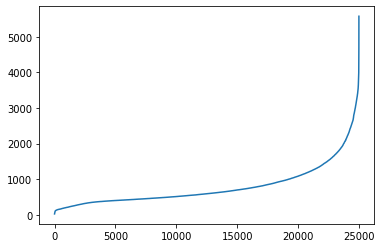

this is for pos


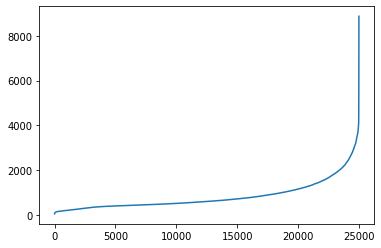

In [13]:
# number of letters in 
num_chr_pos = []
num_chr_neg = []
# length of words in post
for i in positivedf['review']:
    num_chr_pos.append(len(i))
for i in negativedf['review']:
    num_chr_neg.append(len(i))

#WORKING
#print(num_chr_pos)
#print(num_chr_neg)

num_chr_pos = sorted(num_chr_pos)
num_chr_neg = sorted(num_chr_neg)

# print(num_chr_pos)
# print(num_chr_neg)
print("this is for neg")
plt.plot(num_chr_neg)
plt.show()
print("this is for pos")
plt.plot(num_chr_pos)





this is for neg


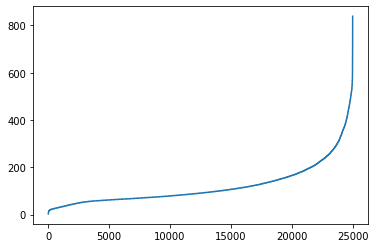

this is for pos


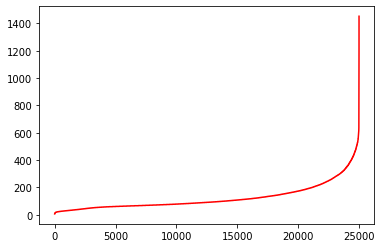

In [14]:
# Number of words in the reviews 
num_word_pos = []
num_word_neg = []
# length of words in post
for i in positivedf['review']:
    num_word_pos.append(len(i.split()))
for i in negativedf['review']:
    num_word_neg.append(len(i.split()))


#print(num_word_neg)
#print(num_word_pos)


num_word_pos = sorted(num_word_pos)
num_word_neg = sorted(num_word_neg)

# print(num_chr_pos)
# print(num_chr_neg)
print("this is for neg")
plt.plot(num_word_neg)
plt.show()
print("this is for pos")
plt.plot(num_word_pos,color="red")


[1, 2, 1, 5, 3, 6, 4, 10, 17, 11, 7, 23, 21, 41, 37, 56, 63, 83, 84, 74, 111, 97, 102, 111, 116, 110, 106, 115, 91, 113, 95, 115, 109, 97, 84, 91, 100, 96, 100, 85, 98, 105, 95, 107, 113, 115, 134, 159, 161, 169, 175, 196, 243, 279, 269, 304, 293, 307, 296, 337, 325, 318, 276, 307, 286, 310, 258, 269, 281, 260, 255, 234, 220, 200, 222, 200, 229, 185, 183, 200, 183, 190, 173, 187, 189, 183, 178, 160, 179, 147, 156, 149, 143, 148, 157, 118, 122, 139, 138, 123, 134, 116, 133, 107, 122, 101, 136, 111, 108, 114, 112, 108, 100, 80, 106, 108, 90, 99, 70, 66, 95, 74, 83, 95, 92, 58, 59, 77, 78, 93, 72, 99, 64, 77, 91, 68, 70, 86, 58, 65, 68, 55, 57, 58, 54, 60, 73, 55, 65, 60, 61, 57, 62, 56, 50, 67, 57, 56, 61, 63, 48, 59, 44, 57, 53, 49, 61, 50, 57, 46, 51, 53, 45, 37, 45, 43, 40, 59, 41, 50, 34, 37, 34, 36, 35, 45, 44, 57, 36, 34, 36, 42, 43, 35, 37, 35, 30, 24, 19, 40, 39, 27, 34, 24, 24, 44, 40, 33, 29, 20, 36, 35, 30, 38, 30, 25, 22, 25, 29, 24, 28, 32, 30, 24, 23, 21, 20, 17, 32, 27, 26

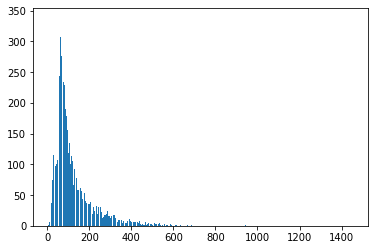

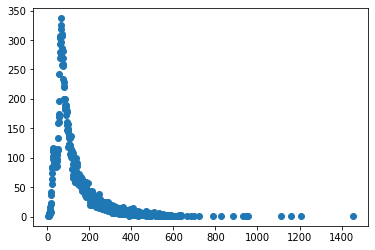

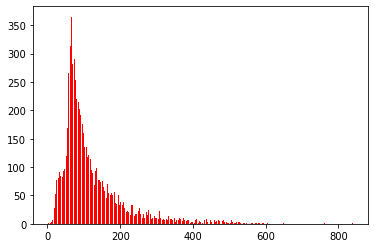

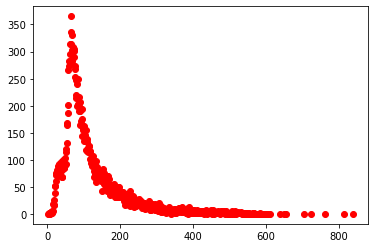

In [15]:
#print(Counter(num_word_neg))
#print(Counter(num_word_pos))
pos_most_words = dict(Counter(num_word_pos))
neg_most_words = dict(Counter(num_word_neg))

print(list(pos_most_words.values()))
print(list(neg_most_words.keys()))

names = list(pos_most_words.keys())
values = list(pos_most_words.values())

#plt.figure(figsize=(90,40))

#plt.plot(names, values)
#plt.show()
plt.bar(names, values)
plt.show()
plt.scatter(names, values)
plt.show()


names = list(neg_most_words.keys())
values = list(neg_most_words.values())



#plt.plot(names, values,color="red")
#plt.show()
plt.bar(names, values,color="red")
plt.show()
plt.scatter(names, values,color="red")
plt.show()

In [ ]:
#print(Counter(num_word_neg))
#print(Counter(num_word_pos))
pos_most_words = dict(Counter(num_word_pos))
neg_most_words = dict(Counter(num_word_neg))

print(list(pos_most_words.values()))
print(list(neg_most_words.keys()))

values = list(pos_most_words.keys())
names = list(pos_most_words.values())

#plt.figure(figsize=(90,40))

#plt.plot(names, values)
#plt.show()
plt.bar(names, values)
plt.show()
plt.scatter(names, values)
plt.show()


values = list(neg_most_words.keys())
names = list(neg_most_words.values())



#plt.plot(names, values,color="red")
#plt.show()
plt.bar(names, values,color="red")
plt.show()
plt.scatter(names, values,color="red")
plt.show()

#This our model

<h5>it works as the following </h5>

In [17]:
# num_word_pos = []
# num_word_neg = []
#length of all
print(len(num_word_pos))
print(len(num_word_neg))
# max length of words
print(num_word_pos[-1])
print(num_word_neg[-1])
# # min length of words
print(num_word_pos[0])
print(num_word_neg[0])

#sorted 
print(sorted(num_word_pos))
print(sorted(num_word_neg))

#counter
print(pos_most_words) 
print(neg_most_words) 

#mean 
def avrg(lst):
    return sum(lst) / len(lst)
print(avrg(num_word_pos))
print(avrg(num_word_neg))

#mean without extrame 
print(avrg(num_word_pos[0:24500]))
print(avrg(num_word_neg[0:24500]))

25000
25000
1453
839
6
3
[6, 7, 7, 8, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,

In [18]:
sort_pos_words = sorted(pos_most_words.items(), key=lambda x: x[1],reverse=True)
#print(sort_pos_words)
sort_neg_words = sorted(neg_most_words.items(), key=lambda x: x[1],reverse=True)
#print(sort_neg_words)

hun_pos = []
num_hun_pos = []
for i in sort_pos_words[0:100]:
  hun_pos.append(i[0])
  num_hun_pos.append(i[1])
hun_neg = []
num_hun_neg = []
for i in sort_neg_words[0:100]:
  hun_neg.append(i[0])
  num_hun_neg.append(i[1])

#Tried 200 100 50 samples and found most distributed was 100
print(sorted(hun_pos))
print(sorted(hun_neg))

# The avrage

print(avrg(hun_pos))
print(avrg(hun_neg))


#Building Model Number of words:
import numpy as np
import re
# stat of the data 
avr_pos = 77.72
avr_neg = 82.58
# std 
# records of number of words (we do not need it because it is very similiar and make sense becasue we got the most frequene in both)
#std_pos = np.std(hun_pos)
#print(std_pos)
#std_neg = np.std(hun_neg)
#print(std_neg)
# record of words
std_pos_val = np.std(num_hun_pos)
print(std_pos_val)
std_neg_val = np.std(num_hun_neg)
print(std_neg_val)

pos_std = 70.49531899353317
neg_std = 77.55009929071659

def model_word(lst):
  import random
  lst =  re.sub("<[^>]+>"," ", lst)
  lst = re.sub("\w+://\S+"," ", lst)
  lst = re.sub("\W"," ", lst)
  lst = re.sub("([0-9]{2}-[0-9]{1,2}-[0-9]{4})|([0-9]{2}/[0-9]{1,2}/[0-9]{4})"," ",lst)
  lst = lst.lower()
  lst = re.sub('[^a-zA-z0-9\s]'," ",lst)
  # (67 - 79) positive
  # (80 - 92) negative
  avr_pos = 77.72
  avpp = avr_pos+2
  avpm = avr_pos-10
  avr_neg = 82.58
  avnp = avr_neg+10
  avnm = avr_pos-2
  wn = len(lst)
  #if (wn < avr_neg and wn > avr_pos):
  if(wn <= avpp and wn >= avpm):
    return "positive"
  elif(wn <= avnp and wn >= avnm):
    return "negative"
  else:
    pn = ["positive","negative"]
    rnd = random.randint(0,1) 
    return pn[rnd] 





#ex = model_word("This movie is a bad  alkdsf jalskd jfalksd faklsd jf;lkajs dlfkaj sd;kfja sdkjf;alkdsjf ;lajsd flkajsd lkfjasdkl fja;lsdkfj alksdjf ;alkjsdf lkajsd lfkja")
#print(ex)

test_x = df["review"][0:1000]
test_y = df["sentiment"][0:1000]
# print(test_x)
# print(test_y)
tr = 0
ans = []

for i in range(100):
  for i in range(1000):
    out = model_word(test_x[i])
    if out == test_y[i]:
        tr += 1
  ans.append(tr)
  tr = 0

print(avrg(ans))
  




[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 123, 126, 129, 130, 135, 137, 140]
[27, 28, 31, 32, 33, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 132, 133, 135, 136, 152]
77.72
82.58
70.49531899353317
77.55009929071659
498.39


In [19]:
test_x = df["review"][0:10000]
test_y = df["sentiment"][0:10000]
# print(test_x)
# print(test_y)
tr = 0
ans = []

for i in range(100):
  for i in range(10000):
    out = model_word(test_x[i])
    if out == test_y[i]:
        tr += 1
  ans.append(tr)
  tr = 0

print(avrg(ans))

4997.19


In [20]:
print(avrg(ans))

4997.19


In [21]:
# import random
# for i in range(1000):
#   print(random.randint(0,1))
print(4994.9/10000)
print(497.35/1000)

0.49949
0.49735


\math-container{}the method used in the simple word model as the following:

1. we calculate the most frequent number of words in the revies 
2. calculate the avrage of the first 100 in each 
3. write the method as the following: 
	a. positive (67 - 79) 
  	b. negative (80 - 92)
as a range for the model to choose according to it 
if the data is out of this range then it will be choosed randomly 

we Achived  aprx 50 accurecy with this simple model 
\math-container{}
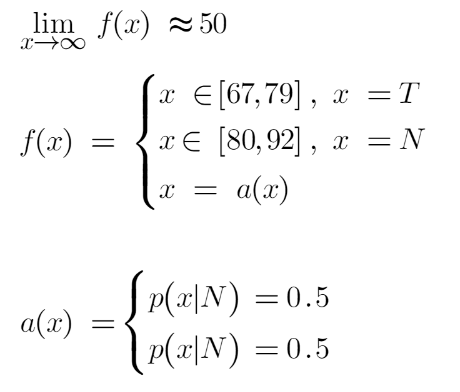